# kc_house_dataset.csv


## Description
This dataset contains information about house sales in King County, Washington, including various attributes of the houses and their sale prices. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score


# Load the dataset
#file_path = 'C:/Users/Mohd Arbaaz khan/Downloads/kc_house_dataset.xlsx'
file_path = 'kc_house_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
print("Shape of the dataset: ",df.shape)

Shape of the dataset:  (21613, 21)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Data Pre-Processing 

## Step 1: Removing duplicate entries


In [18]:
print("Before removing duplicates, data shape:", df.shape)
df.drop_duplicates(subset='id', keep='first', inplace=True)
print("After removing duplicates, data shape:", df.shape)


Before removing duplicates, data shape: (21613, 21)
After removing duplicates, data shape: (21436, 21)


## Step 2: Handle missing values.

In [21]:
# Check for missing values
missing_values = df.isnull().sum()
print("Step 2: Missing values in data is:\n", missing_values)

Step 2: Missing values in data is:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## Step 3: Checking and Correcting Data Types.


In [24]:
#Checking data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [26]:
# Step 3: Correct data types
df['date'] = pd.to_datetime(df['date'].astype(str).str[:8], format='%Y%m%d')  

# changing price data type
df['price'] = df['price'].astype(float)

In [28]:
#checking again to confirm data types
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [30]:
#printing the changes of few rows
print("Sample dates after correction:\n", df['date'].head())
print ("prices after changing data type:\n",df['price'].head())

Sample dates after correction:
 0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]
prices after changing data type:
 0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64


## Step 4: Handle outliers

In [33]:
# Remove rows with bedrooms > 30 (outliers)
df = df[df['bedrooms'] <= 30]

In [35]:
# Check for outliers in 'bedrooms'
print("Step 4: Bedrooms value counts after removing outliers:\n", df['bedrooms'].value_counts())

Step 4: Bedrooms value counts after removing outliers:
 bedrooms
3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
0       13
8       13
9        6
10       3
11       1
Name: count, dtype: int64


In [37]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Before removing outliers in {column}, data shape:", df.shape)
    outliers = df[((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    df_cleaned = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    print(f"After removing outliers in {column}, data shape:", df_cleaned.shape)
    print(f"Outliers in {column} stored separately:\n", outliers)
    return df_cleaned, outliers

# Apply the function to the 'price' column
df, outliers_price = remove_outliers(df, 'price')


Before removing outliers in price, data shape: (21435, 21)
After removing outliers in price, data shape: (20296, 21)
Outliers in price stored separately:
                id       date      price  bedrooms  bathrooms  sqft_living  \
5      7237550310 2014-05-12  1225000.0         4       4.50         5420   
21     2524049179 2014-08-26  2000000.0         3       2.75         3050   
49      822039084 2015-03-11  1350000.0         3       2.50         2753   
69     1802000060 2014-06-12  1325000.0         5       2.25         3200   
125    4389200955 2015-03-02  1450000.0         4       2.75         2750   
...           ...        ...        ...       ...        ...          ...   
21568   524059330 2015-01-30  1700000.0         4       3.50         3830   
21576  9253900271 2015-01-07  3567000.0         5       4.50         4850   
21590  7430200100 2014-05-14  1222500.0         4       3.50         4910   
21597   191100405 2015-04-21  1575000.0         4       3.25         3410  

In [39]:
#Check for houses with 0 bedrooms or bathrooms
print("Houses with 0 bedrooms or bathrooms:\n", df[(df['bedrooms'] == 0) | (df['bathrooms'] == 0)])

Houses with 0 bedrooms or bathrooms:
                id       date      price  bedrooms  bathrooms  sqft_living  \
875    6306400140 2014-06-12  1095000.0         0       0.00         3064   
1149   3421079032 2015-02-17    75000.0         1       0.00          670   
3119   3918400017 2015-02-05   380000.0         0       0.00         1470   
3467   1453602309 2014-08-05   288000.0         0       1.50         1430   
4868   6896300380 2014-10-02   228000.0         0       1.00          390   
5832   5702500050 2014-11-04   280000.0         1       0.00          600   
8477   2569500210 2014-11-17   339950.0         0       2.50         2290   
8484   2310060040 2014-09-25   240000.0         0       2.50         1810   
9773   3374500520 2015-04-29   355000.0         0       0.00         2460   
9854   7849202190 2014-12-23   235000.0         0       0.00         1470   
10481   203100435 2014-09-18   484000.0         1       0.00          690   
12653  7849202299 2015-02-18   320000.

## Step 5: Handle Inconsistencies


In [42]:
# Step 5: Handle inconsistencies
print("Before handling inconsistencies, data shape:", df.shape)
df_filtered = df[(df['bedrooms'] > 0) & (df['bathrooms'] > 0) & (df['bedrooms'] <= 8)]
print("After handling inconsistencies, data shape:", df_filtered.shape)
df = df_filtered

Before handling inconsistencies, data shape: (20296, 21)
After handling inconsistencies, data shape: (20274, 21)


In [44]:
# Check for houses with 0 bedrooms or bathrooms
print("Houses with 0 bedrooms or bathrooms:\n", df[(df['bedrooms'] == 0) | (df['bathrooms'] == 0)])


Houses with 0 bedrooms or bathrooms:
 Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


In [46]:
# Ensure no house has 0 bedrooms, 0 bathrooms, or more than 8 bedrooms
df = df[(df['bedrooms'] > 0) & (df['bathrooms'] > 0) & (df['bedrooms'] <= 8)]

In [48]:
df.shape

(20274, 21)

## Step 6: Creating derived features

In [51]:
# Convert price to float 
df['price'] = df['price'].astype(float)

# Function to format price
def format_price(price):
    if price >= 1000000:
        return f"{price/1000000:.2f}M"
    elif price >= 1000:
        return f"{price/1000:.1f}K"
    else:
        return f"{price:.0f}"

# Apply the formatting function to create a new column
df['price_formatted'] = df['price'].apply(format_price)

# Check the result
print(df[['price', 'price_formatted']].head(10))

       price price_formatted
0   221900.0          221.9K
1   538000.0          538.0K
2   180000.0          180.0K
3   604000.0          604.0K
4   510000.0          510.0K
6   257500.0          257.5K
7   291850.0          291.9K
8   229500.0          229.5K
9   323000.0          323.0K
10  662500.0          662.5K


In [53]:
# Step 6: Create derived features
print("Before creating derived features, data shape:", df.shape)
df['age'] = 2024 - df['yr_built']  # Assuming current year is 2024
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)  # Binary feature for renovation
df['bath_bed_ratio'] = df['bathrooms'] / df['bedrooms']  # Ratio of bathrooms to bedrooms
print("After creating derived features, data shape:", df.shape)

Before creating derived features, data shape: (20274, 22)
After creating derived features, data shape: (20274, 25)


In [55]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_formatted,age,renovated,bath_bed_ratio
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,221.9K,69,0,0.333333
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,538.0K,73,1,0.750000
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,180.0K,91,0,0.500000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,604.0K,59,0,0.750000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,510.0K,37,0,0.666667


## Step 7: Saving the cleaned file into local system.

In [58]:
# Save cleaned dataset
df.to_csv('Final_dataset_cleaned.csv', index=False)

print("Data cleaning completed and saved to 'Final_dataset_cleaned.csv'")

Data cleaning completed and saved to 'Final_dataset_cleaned.csv'


# Exploratory Data Analysis

In [2]:
kc_house_cleaned = pd.read_csv('Final_dataset_cleaned.csv')
kc_house_cleaned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_formatted,age,renovated,bath_bed_ratio
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,221.9K,69,0,0.333333
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,538.0K,73,1,0.750000
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,180.0K,91,0,0.500000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,604.0K,59,0,0.750000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,510.0K,37,0,0.666667


In [3]:
print("Shape of the dataset: ",kc_house_cleaned.shape)

Shape of the dataset:  (20274, 25)


In [4]:
# Checking null values, columns and datatypes
kc_house_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20274 entries, 0 to 20273
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20274 non-null  int64  
 1   date             20274 non-null  object 
 2   price            20274 non-null  float64
 3   bedrooms         20274 non-null  int64  
 4   bathrooms        20274 non-null  float64
 5   sqft_living      20274 non-null  int64  
 6   sqft_lot         20274 non-null  int64  
 7   floors           20274 non-null  float64
 8   waterfront       20274 non-null  int64  
 9   view             20274 non-null  int64  
 10  condition        20274 non-null  int64  
 11  grade            20274 non-null  int64  
 12  sqft_above       20274 non-null  int64  
 13  sqft_basement    20274 non-null  int64  
 14  yr_built         20274 non-null  int64  
 15  yr_renovated     20274 non-null  int64  
 16  zipcode          20274 non-null  int64  
 17  lat         

In [5]:
# Performing descriptive statistics over numerical variables
kc_house_cleaned.describe().applymap('{:,.2f}'.format).transpose()

C:\Users\dsta0\AppData\Local\Temp\ipykernel_26760\2592509111.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  kc_house_cleaned.describe().applymap('{:,.2f}'.format).transpose()


,count,mean,std,min,25%,50%,75%,max
id,"20,274.00","4,604,763,171.10","2,877,374,137.88","1,000,102.00","2,133,012,722.50","3,905,081,525.00","7,338,150,425.00","9,900,000,190.00"
price,"20,274.00","477,309.26","208,439.26","78,000.00","315,000.00","438,000.00","600,900.00","1,127,500.00"
bedrooms,"20,274.00",3.33,0.88,1.00,3.00,3.00,4.00,8.00
bathrooms,"20,274.00",2.05,0.71,0.50,1.50,2.00,2.50,6.75
sqft_living,"20,274.00","1,978.27",774.88,370.00,"1,400.00","1,860.00","2,440.00","7,480.00"
sqft_lot,"20,274.00","14,641.94","40,244.22",520.00,"5,000.00","7,500.00","10,320.75","1,651,359.00"
floors,"20,274.00",1.48,0.54,1.00,1.00,1.00,2.00,3.50
waterfront,"20,274.00",0.00,0.05,0.00,0.00,0.00,0.00,1.00
view,"20,274.00",0.17,0.64,0.00,0.00,0.00,0.00,4.00
condition,"20,274.00",3.41,0.65,1.00,3.00,3.00,4.00,5.00


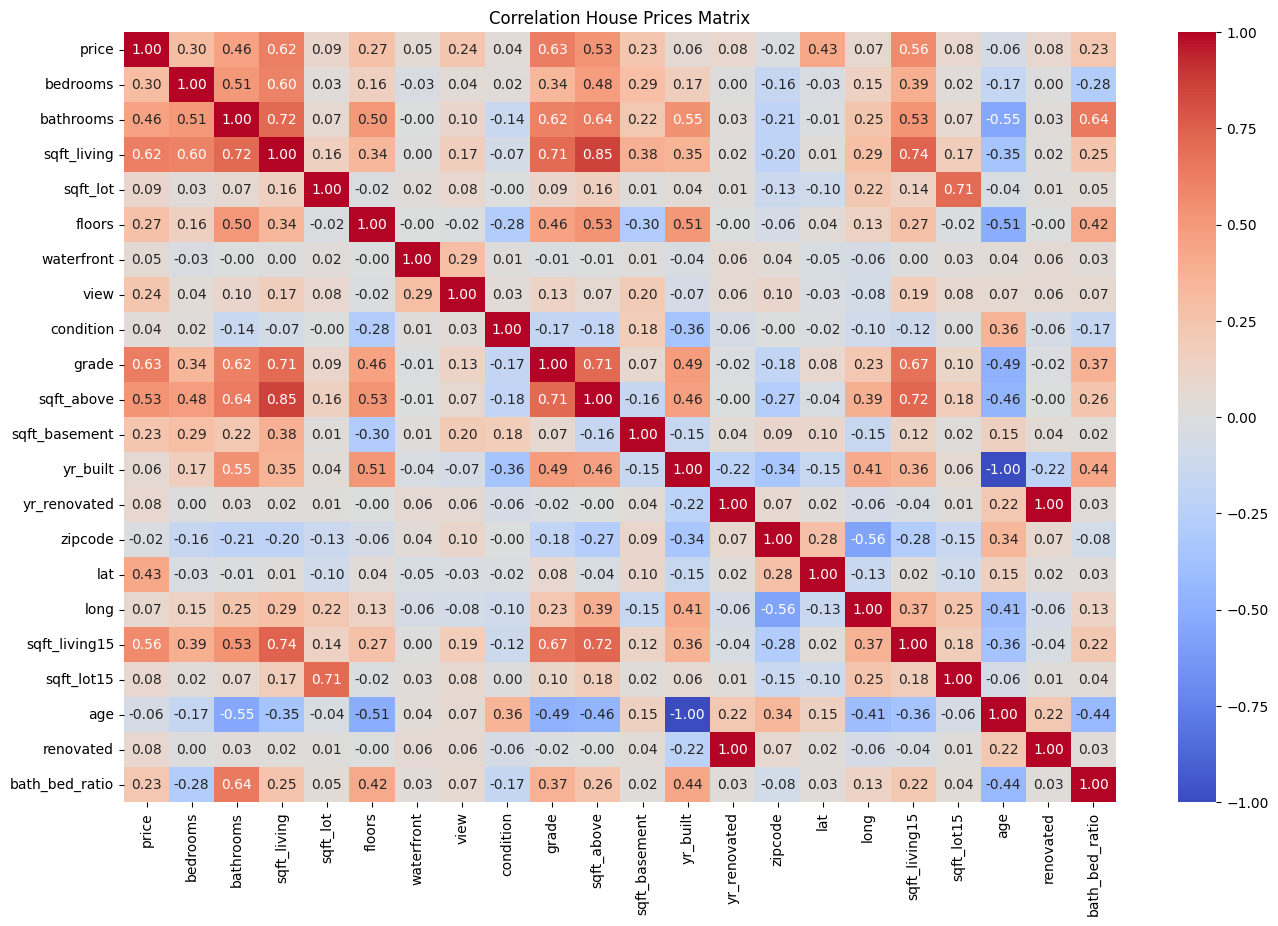

In [6]:
kc_house_cleaned = kc_house_cleaned.drop(columns=['id', 'date', 'price_formatted'], axis=1)

# Correlation analysis over the dataset
plt.figure(figsize=(16,10))
sns.heatmap(kc_house_cleaned.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title('Correlation House Prices Matrix')
plt.show()

# Data Visualization

In [73]:
kc_cleaned = pd.read_csv('Final_dataset_cleaned.csv')

     age          price
0      9  583835.354839
1     10  598925.021484
2     11  565917.546961
3     12  495422.481707
4     13  493494.274194
..   ...            ...
111  120  519861.604651
112  121  483001.711111
113  122  570675.000000
114  123  533076.500000
115  124  529798.604938

[116 rows x 2 columns]


C:\Users\jhonm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jhonm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Average House Price by House Age')

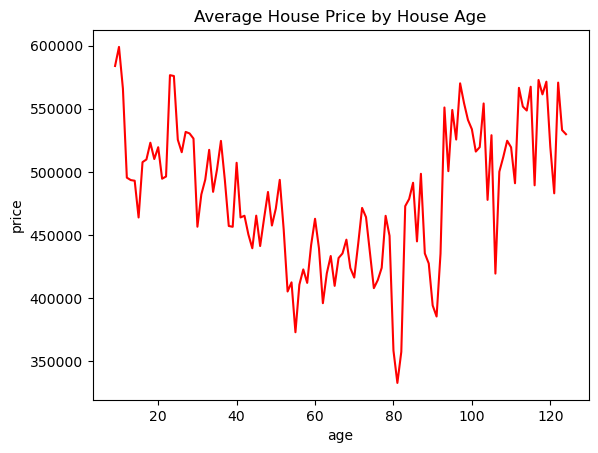

In [77]:
price_by_year=kc_cleaned.groupby(['age'])['price'].mean().reset_index()
print(price_by_year)
sns.lineplot(price_by_year, x='age', y= 'price',c="red")
plt.title('Average House Price by House Age')

C:\Users\jhonm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jhonm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


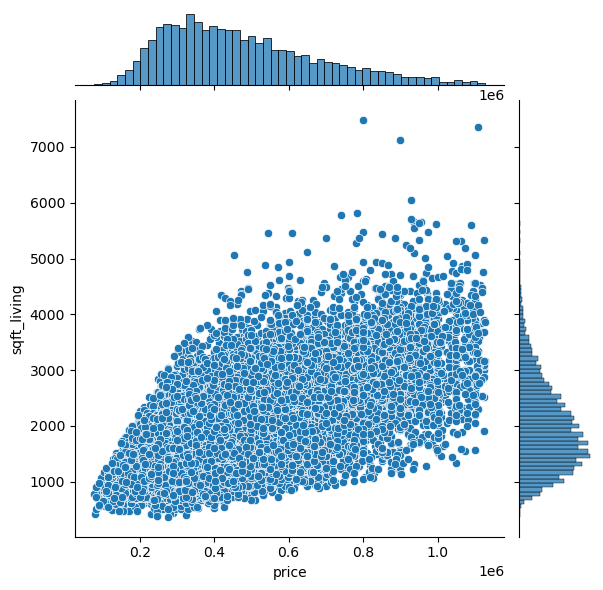

In [79]:
sns.jointplot(x='price', y='sqft_living', data=kc_cleaned)

C:\Users\jhonm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


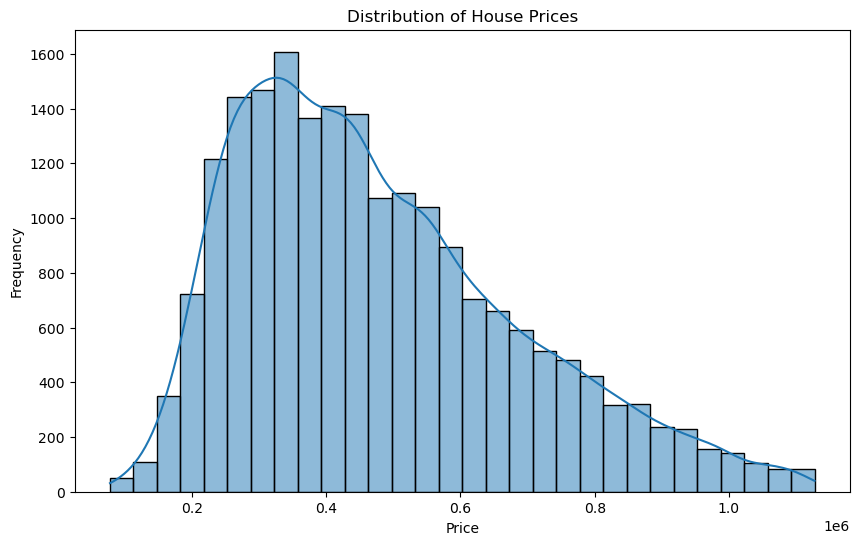

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(kc_cleaned['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

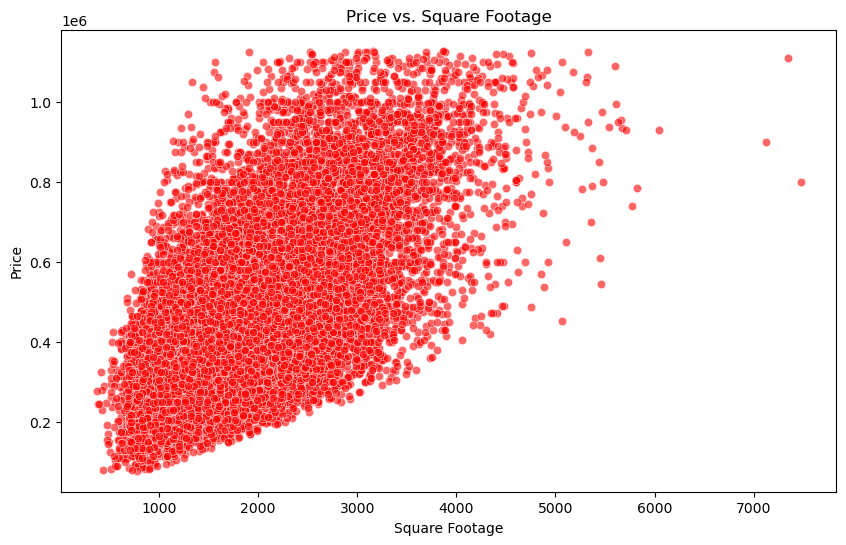

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=kc_cleaned, alpha=0.6, c="red")
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

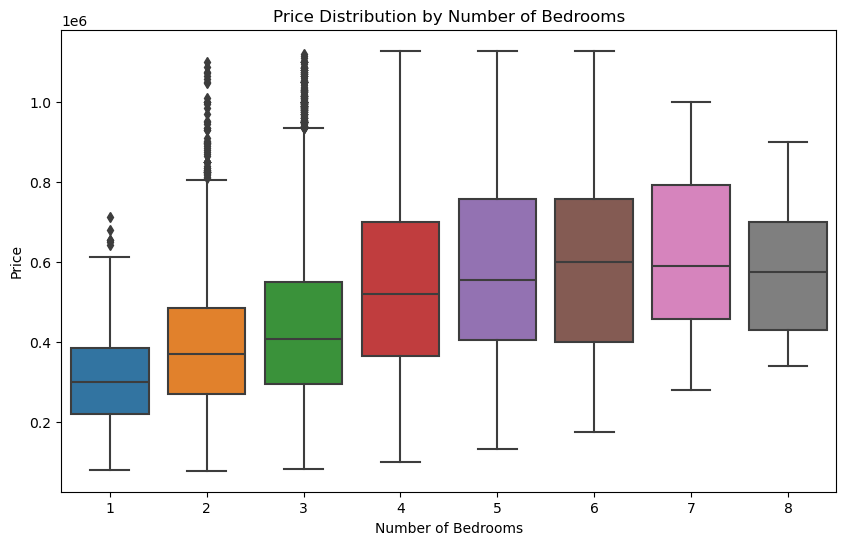

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=kc_cleaned)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Predictive Model

In [63]:
kc_cleaned = pd.read_csv('Final_dataset_cleaned.csv')
kc_cleaned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_formatted,age,renovated,bath_bed_ratio
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,221.9K,69,0,0.333333
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,538.0K,73,1,0.750000
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,180.0K,91,0,0.500000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,604.0K,59,0,0.750000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,510.0K,37,0,0.666667


## Base Model

In [64]:
kc_cleaned = kc_cleaned.drop(columns=['id','date','price_formatted','age','renovated','bath_bed_ratio'], axis=1)
kc_cleaned.shape

(20274, 19)

In [65]:
# Independent variables (x)
x = kc_cleaned.drop('price', axis=1)

# Variable to predict (y)
y = kc_cleaned['price']

In [66]:
# Split data into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Define model
lr = linear_model.LinearRegression()

# Train the model
lr.fit(x_train, y_train)

LinearRegression()

In [67]:
# Evaluate model over test dataset
lr.score(x_test, y_test)

0.7002417843061053

In [68]:
# Make predictions over test subset
y_pred = lr.predict(x_test)

In [69]:
# Display metrics
print("Mean absolute error: ", round(mean_absolute_error(y_test, y_pred),2))

print("RMSE: ", round(mean_squared_error(y_test, y_pred, squared=False),2))

print("R2 score: ", round(r2_score(y_test, y_pred),4))

Mean absolute error:  87085.19
RMSE:  114493.51
R2 score:  0.7002


In [70]:
# Show variables' coefficients
feature_names = x.columns.values
df_lr = pd.DataFrame({'Feature names': feature_names, 'Coef':lr.coef_})
print(df_lr)

    Feature names           Coef
0        bedrooms  -11176.219780
1       bathrooms   26696.439764
2     sqft_living      46.749991
3        sqft_lot       0.218391
4          floors   31774.678133
5      waterfront  103503.455843
6            view   31548.720057
7       condition   27429.171387
8           grade   73028.799133
9      sqft_above      24.153521
10  sqft_basement      22.596471
11       yr_built   -1762.548237
12   yr_renovated      15.087379
13        zipcode    -219.815531
14            lat  546820.619959
15           long  -49944.745094
16  sqft_living15      47.280539
17     sqft_lot15      -0.108053


In [71]:
# Show intercept
lr.intercept_

-7547154.4461600315

## Feature Selection 1
Drop columns with very few influence to the model based on correlation

In [72]:
# Evaluate correlation against the dependent variable
abs(kc_cleaned.corr()["price"])

price            1.000000
bedrooms         0.304568
bathrooms        0.456939
sqft_living      0.622513
sqft_lot         0.094511
floors           0.273093
waterfront       0.051591
view             0.238550
condition        0.037100
grade            0.632486
sqft_above       0.530716
sqft_basement    0.234927
yr_built         0.061087
yr_renovated     0.083989
zipcode          0.019071
lat              0.429143
long             0.071628
sqft_living15    0.562610
sqft_lot15       0.083267
Name: price, dtype: float64

In [73]:
# Select the most significant variables
features_sel = abs(kc_cleaned.corr()['price'][abs(kc_cleaned.corr()['price']) > 0.06].drop('price')).index.tolist()
features_sel

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [74]:
x = kc_cleaned.drop('price', axis=1)
# Filter the selected variables
x = x[features_sel]

# Variable to predict
y = kc_cleaned['price']


In [75]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1761,2,1.00,990,8250,1.0,0,0,3,7,990,0,1955,0,98133,47.7252,-122.331,1080,8168
297,4,2.50,2370,4000,1.5,0,2,5,8,1980,390,1928,0,98144,47.6010,-122.294,2440,5750
838,3,2.50,1940,10035,2.0,0,0,4,8,1940,0,1994,0,98072,47.7438,-122.172,2810,8333
9404,3,1.75,1680,8100,1.0,0,2,3,8,1680,0,1950,0,98177,47.7212,-122.364,1880,7750
10723,3,1.50,1150,8686,1.0,0,0,4,7,1150,0,1963,0,98055,47.4417,-122.194,1760,8798


In [76]:
# Split data into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Define model
lr = linear_model.LinearRegression()

# Train the model
lr.fit(x_train, y_train)

LinearRegression()

In [77]:
# Evaluate model over test dataset
lr.score(x_test, y_test)

0.6885336144918708

In [78]:
# Evaluate model over train dataset
lr.score(x_train, y_train)

0.688403176596734

In [79]:
# Make predictions over test subset
y_pred = lr.predict(x_test)

In [80]:
# Display metrics
print("Mean absolute error: ", round(mean_absolute_error(y_test, y_pred),2))

print("RMSE: ", round(mean_squared_error(y_test, y_pred, squared=False),2))

print("R2 score: ", round(r2_score(y_test, y_pred),4))

Mean absolute error:  88542.26
RMSE:  116499.93
R2 score:  0.6885


## Feature Selection 2
Drop columns that are higly correlated

<Axes: >

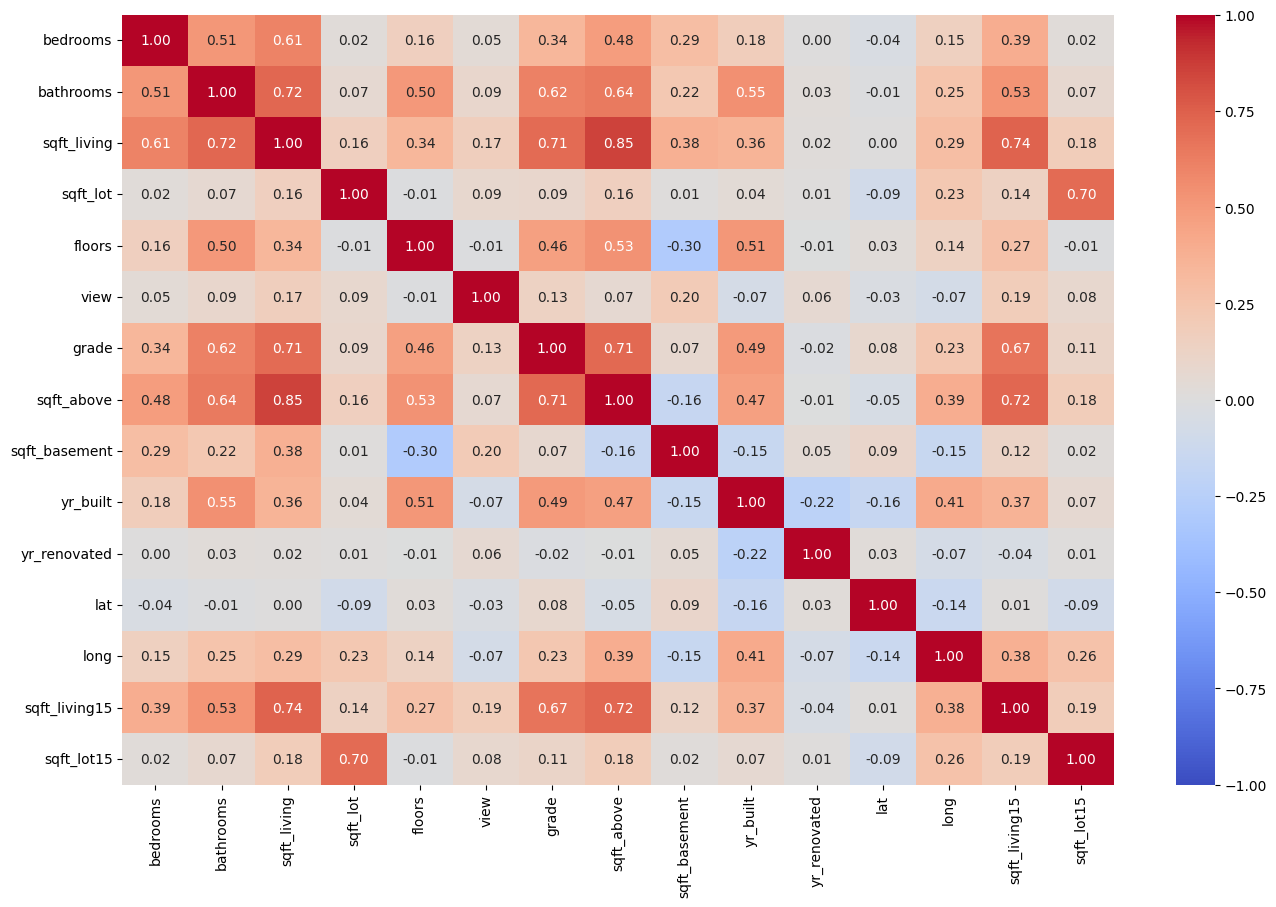

In [81]:
# Check heatmap for variables that are highly correlated
plt.figure(figsize=(16,10))
sns.heatmap(x_train.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, center=0)

In [82]:
# Function that selects highly correlated features
# It will remove the first feature that is highly correlated with another feature
def correlation(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [83]:
# Apply the previous function to the train dataset
corr_features = correlation(x_train,0.8)
corr_features

{'sqft_above'}

In [84]:
# Drop those highly correlated features 
x_train_filtered = x_train.drop(corr_features,axis=1)
x_test_filtered = x_test.drop(corr_features,axis=1)

x_train_filtered.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
9384,4,2.50,2190,17600,1.0,0,7,1080,1966,0,47.4712,-122.112,1820,17600
1904,3,1.75,2140,40098,1.0,0,8,650,1950,0,47.4296,-122.111,2220,35371
12785,4,2.75,3010,3400,2.0,2,9,770,1923,2009,47.6142,-122.284,1940,5080
14628,4,1.50,1320,14250,1.0,0,7,0,1954,0,47.7016,-122.199,1720,14250
4079,3,1.00,970,9600,1.0,0,7,0,1972,0,47.4451,-121.768,1110,9600


In [85]:
# Define model
lr = linear_model.LinearRegression()

# Train the model
lr.fit(x_train_filtered, y_train)

LinearRegression()

In [86]:
# Evaluate model over test dataset
lr.score(x_test_filtered, y_test)

0.6885336144918326

In [87]:
# Make predictions over test subset
y_pred = lr.predict(x_test_filtered)

In [88]:
# Display metrics
print("Mean absolute error: ", round(mean_absolute_error(y_test, y_pred),2))

print("RMSE: ", round(mean_squared_error(y_test, y_pred, squared=False),2))

print("R2 score: ", round(r2_score(y_test, y_pred),4))

Mean absolute error:  88542.26
RMSE:  116499.93
R2 score:  0.6885
